# QC Results

In [4]:
import pandas as pd

# load the data
qc_results_df = pd.read_csv('qc-results.csv')

# function to get grade from standard id
def get_grade(s: str) -> str:
    parts = s.split(".")
    if len(parts) >= 4:
        return parts[3]
    return None

In [10]:
qc_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model               87 non-null     object 
 1   standard            87 non-null     object 
 2   topic               87 non-null     object 
 3   question            87 non-null     object 
 4   rubric              87 non-null     object 
 5   answer level        87 non-null     int64  
 6   evaluation          87 non-null     object 
 7   question_quality    87 non-null     float64
 8   rubric_quality      87 non-null     float64
 9   eval_score          87 non-null     int64  
 10  evaluation_quality  87 non-null     float64
 11  grade               87 non-null     object 
 12  overall_quality     87 non-null     float64
dtypes: float64(4), int64(2), object(7)
memory usage: 9.0+ KB


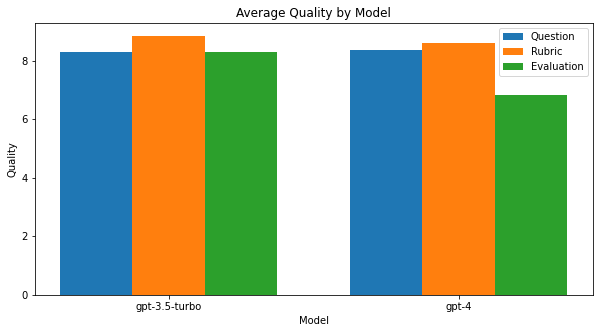

In [5]:
# Plot the average quality of the question, rubric, and evaluation by model
import matplotlib.pyplot as plt
import numpy as np

# Group by model and calculate the average quality
model_quality = qc_results_df.groupby('model').mean()[['question_quality', 'rubric_quality', 'evaluation_quality']]
model_quality = model_quality.reset_index()

# Plot the average quality by model
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(model_quality['model']))
width = 0.25
ax.bar(x - width, model_quality['question_quality'], width, label='Question')
ax.bar(x, model_quality['rubric_quality'], width, label='Rubric')
ax.bar(x + width, model_quality['evaluation_quality'], width, label='Evaluation')
ax.set_xticks(x)
ax.set_xticklabels(model_quality['model'])
ax.set_xlabel('Model')
ax.set_ylabel('Quality')
ax.set_title('Average Quality by Model')
ax.legend()
plt.show()


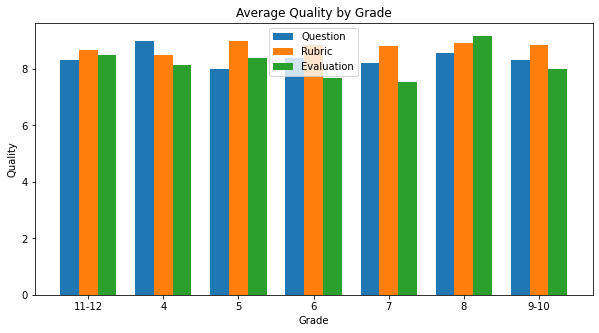

In [6]:
# Plot the average quality of the question, rubric, and evaluation by grade
# Add grade column using the get_grade function on the standard column
qc_results_df['grade'] = qc_results_df['standard'].apply(get_grade)

# Group by grade and calculate the average quality
grade_quality = qc_results_df.groupby('grade').mean()[['question_quality', 'rubric_quality', 'evaluation_quality']]
grade_quality = grade_quality.reset_index()

# Plot the average quality by grade
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(grade_quality['grade']))
width = 0.25
ax.bar(x - width, grade_quality['question_quality'], width, label='Question')
ax.bar(x, grade_quality['rubric_quality'], width, label='Rubric')
ax.bar(x + width, grade_quality['evaluation_quality'], width, label='Evaluation')
ax.set_xticks(x)
ax.set_xticklabels(grade_quality['grade'])
ax.set_xlabel('Grade')
ax.set_ylabel('Quality')
ax.set_title('Average Quality by Grade')
ax.legend()
plt.show()

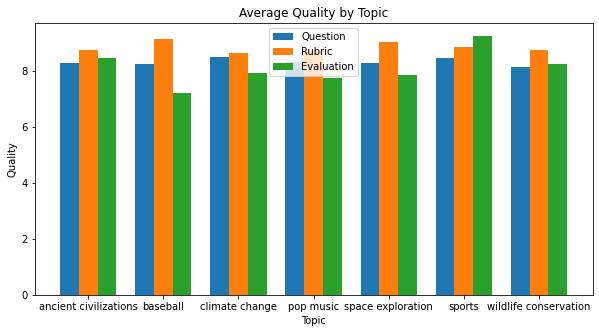

In [7]:
# Plot the average quality of the question, rubric, and evaluation by topic
import matplotlib.pyplot as plt
import numpy as np

# Group by topic and calculate the average quality
topic_quality = qc_results_df.groupby('topic').mean()[['question_quality', 'rubric_quality', 'evaluation_quality']]
topic_quality = topic_quality.reset_index()

# Plot the average quality by topic
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(topic_quality['topic']))
width = 0.25
ax.bar(x - width, topic_quality['question_quality'], width, label='Question')
ax.bar(x, topic_quality['rubric_quality'], width, label='Rubric')
ax.bar(x + width, topic_quality['evaluation_quality'], width, label='Evaluation')
ax.set_xticks(x)
ax.set_xticklabels(topic_quality['topic'])
ax.set_xlabel('Topic')
ax.set_ylabel('Quality')
ax.set_title('Average Quality by Topic')
ax.legend()
plt.show()



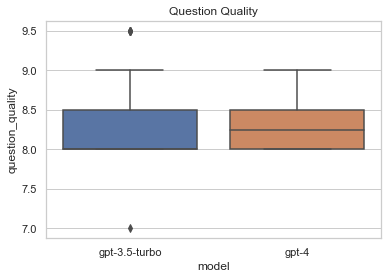

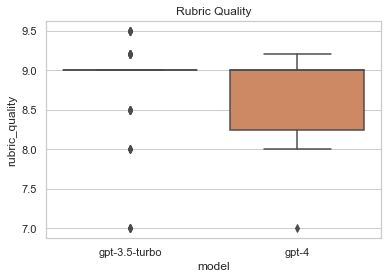

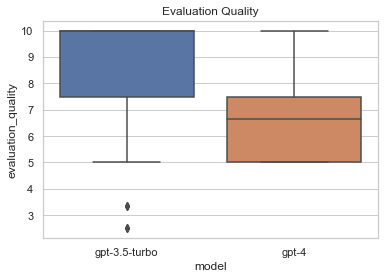

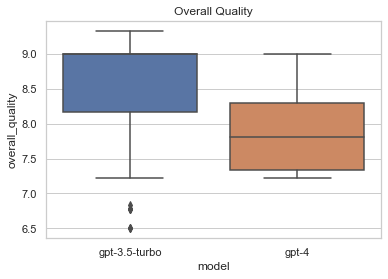

In [9]:
# Plot the results (this is only meaninful when we have a large number of simulations)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Plot the question quality
ax = sns.boxplot(x="model", y="question_quality", data=qc_results_df)
ax.set_title('Question Quality')
plt.show()

# Plot the rubric quality
ax = sns.boxplot(x="model", y="rubric_quality", data=qc_results_df)
ax.set_title('Rubric Quality')
plt.show()

# Plot the evaluation quality
ax = sns.boxplot(x="model", y="evaluation_quality", data=qc_results_df)
ax.set_title('Evaluation Quality')
plt.show()

# Plot the overall quality
qc_results_df['overall_quality'] = qc_results_df[['question_quality', 'rubric_quality', 'evaluation_quality']].mean(axis=1)
ax = sns.boxplot(x="model", y="overall_quality", data=qc_results_df)
ax.set_title('Overall Quality')
plt.show()